# Liquid-liquid equilibrium in polymer solutions

## Estimation of Flory-Huggins interaction parameter from XS test data

### Paper 3

This notebook contains an estimation procedure for the parameters of the Flory-Huggins model applied to the LLE data presented in [MATOS *et al.* (2007)](https://onlinelibrary.wiley.com/doi/full/10.1002/mren.200600003).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Tompa import Tompa

In [3]:
####################
# EXPERIMENTAL DATA
####################

z_sol = 0.97738

labels = ['C2-23','C4-24','C5-27','C9-45']

teta1 = 1e-4*np.array([[1.356,1.498],[2.490,13.90],[1.286,18.50],[1.436,1.560]])

teta2 = 1e-4*np.array([[5.956,6.366],[1.261,15.11],[4.585,12.54],[7.290,5.289]])

alpha = np.array([[0.618,0.282],[0.170,0.139],[0.395,0.185],[0.458,0.148]])

mw = np.array([252.9,171.1,253.3,215])

xs = 1e-2*np.array([31.76,13.10,31.13,41.04])

# creating list of objects for each polymer
polymers = [Tompa(label=labels[i], z_sol = z_sol,
                  shulz_kind='3P', r_pol = np.arange(1e1,4e4),
                  teta1 = teta1[i], teta2 = teta2[i],
                  alpha = alpha[i],xs_fraction = xs[i]) 
            for i in range(len(labels))]


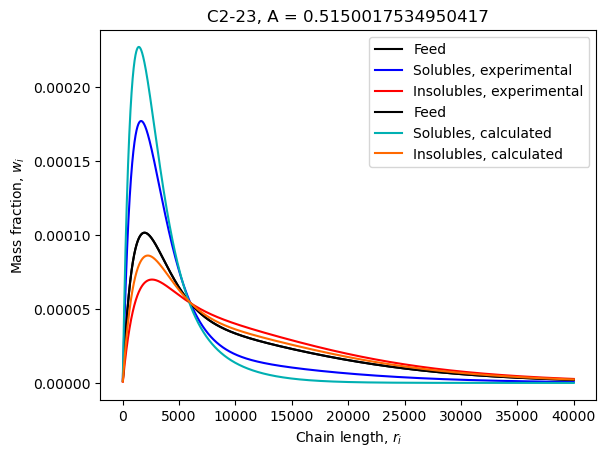

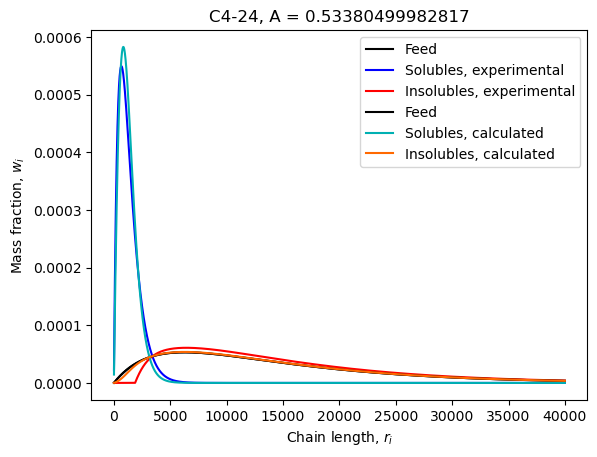

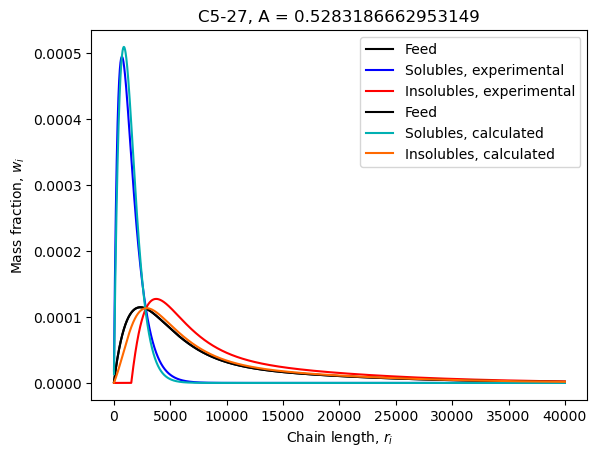

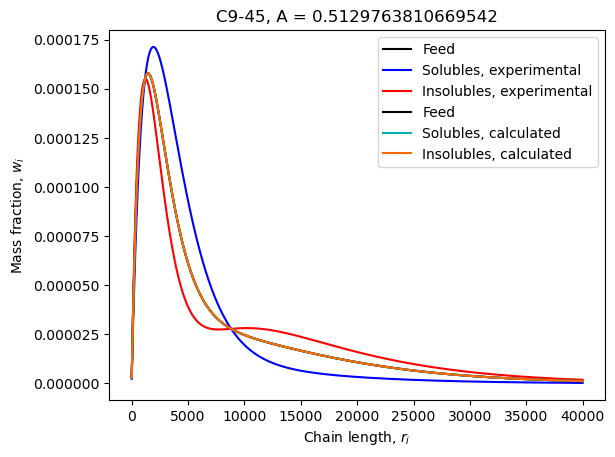

In [4]:
for p in polymers:
    p.estimation()
    plt.figure()
    p.plot_Experimental_Distributions()
    p.plot_Calculated_Distributions()

In [5]:
chi = [p.A for p in polymers]

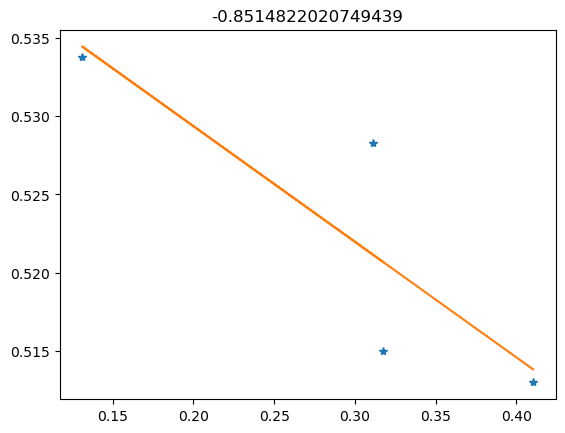

In [6]:
a, b = np.polyfit(xs, chi, 1)

plt.plot(xs,chi,'*')
plt.plot(xs,a*xs+b)
plt.title((np.corrcoef(xs, chi)[0,1]));

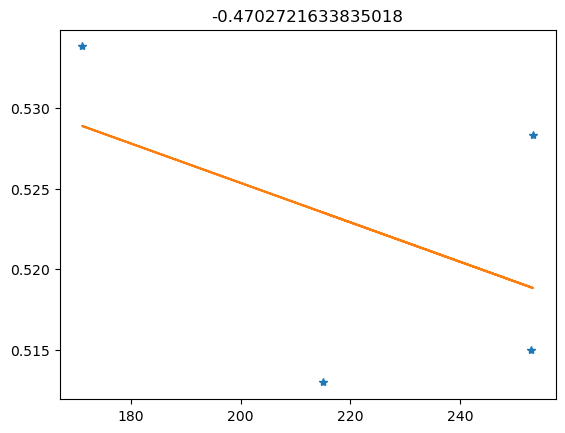

In [7]:
a, b = np.polyfit(mw, chi, 1)

plt.plot(mw,chi,'*')
plt.plot(mw,a*mw+b)
plt.title((np.corrcoef(mw, chi)[0,1]));